In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from keras import models, layers, optimizers, regularizers
from keras.datasets import boston_housing
%config Completer.use_jedi = False


# Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Como los valores en el dataset no estan en una misma escala, tengo que normalizarlos

## Normalizacion

In [5]:
mean = train_data.mean()
std = train_data.std()
mean_test = test_data.mean()
std_test = test_data.std()


train_data = (train_data - mean) / std
test_data = (test_data - mean_test) / std_test

In [6]:
train_data[0]

array([-0.47482083, -0.48335641, -0.42698208, -0.48335641, -0.47963044,
       -0.44081941,  0.15172056, -0.45581402, -0.45565404,  1.64280094,
       -0.33791894,  2.26541184, -0.35370929])

# Modelo

In [7]:
def buil_model(shape, lr):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (shape,) , kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(30,activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(30,activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer = optimizers.RMSprop(learning_rate = lr),
        loss = 'mse',
        metrics = ['mae']
    )
    
    return model

In [8]:
k = 4
num_val_samples = len(train_data) // k 
num_epochs = 80
lr = 0.001
all_history = []
all_history_v = []

In [9]:
for i in range(k):
    print('Fold number:',i)
    
    X_val = train_data[i*num_val_samples:(i+1)*num_val_samples]
    y_val = train_labels[i*num_val_samples:(i+1)*num_val_samples]
    
    X = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    y = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)
    
    model = buil_model(13,lr)
    output = model.fit(
        X,y,
        epochs = num_epochs,
        batch_size = 16,
        validation_data = (X_val,y_val),
        verbose = 0
        
    )
    all_history_v.append(output.history['val_mae'])
    all_history.append(output.history['mae'])

Fold number: 0
Fold number: 1
Fold number: 2
Fold number: 3


In [10]:
mae_values_v = pd.DataFrame(all_history_v).mean(axis = 0)
mae_values =  pd.DataFrame(all_history).mean(axis = 0)

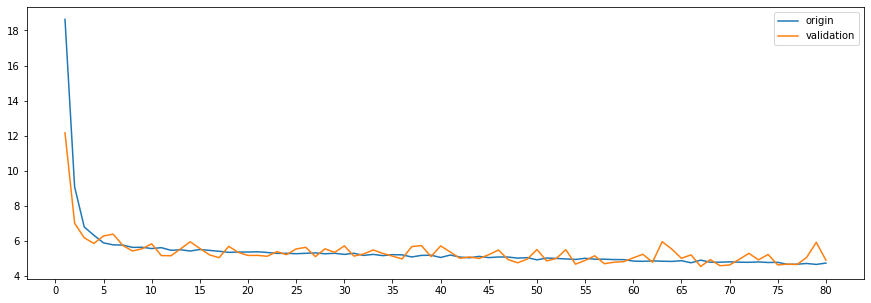

In [14]:
plt.figure(figsize=(15,5))
plt.plot(range(1, len(mae_values)+1), mae_values, label='origin')
plt.plot(range(1, len(mae_values_v)+1), mae_values_v, label='validation')
plt.xticks(range(0, len(mae_values)+1,5))
plt.legend()
plt.show()

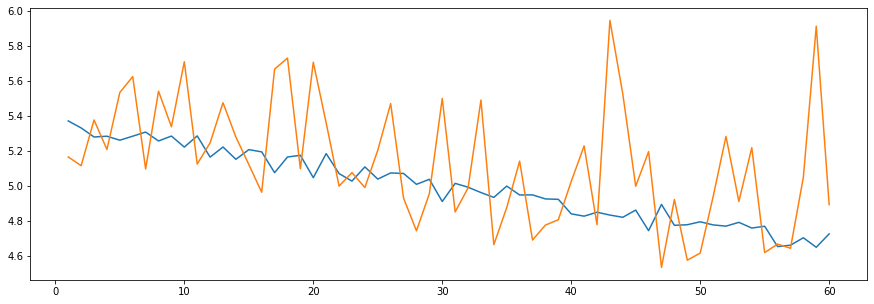

In [12]:
plt.figure(figsize=(15,5))
plt.plot(range(1, len(mae_values[20:])+1), mae_values[20:], label='origin')
plt.plot(range(1, len(mae_values_v[20:])+1), mae_values_v[20:], label='validation')
#plt.xticks(range(0, len(mae_values[15:])+1,5))
plt.show()

In [17]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 57.7447 - mae: 5.8171


[57.744686126708984, 5.817116737365723]